# 多项式回归

## 8-1 多项式回归的原理

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5* x**2 + 2 + np.random.normal(0, 1, size=100)

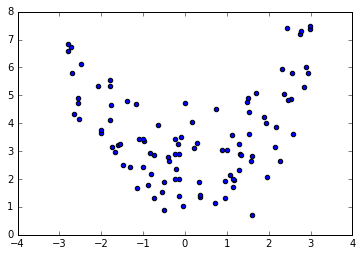

In [4]:
plt.scatter(x, y)

**线性拟合**

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

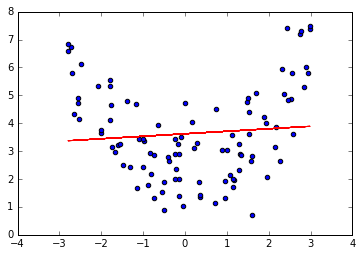

In [7]:
y_predict = lin_reg.predict(X)

plt.scatter(x,y)
plt.plot(X, y_predict,color='r')

**解决方案，添加一个特征**

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

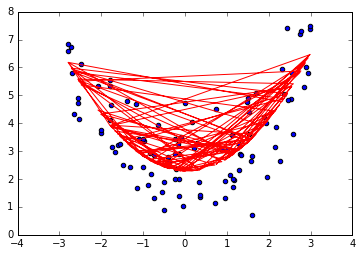

In [15]:
plt.scatter(x,y)
plt.plot(x, y_predict2, color='r')

**X没有顺序**

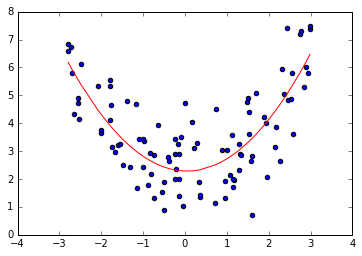

In [16]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

In [17]:
lin_reg2.coef_

array([-0.04557605,  0.48355445])

In [18]:
lin_reg2.intercept_

2.285492012471239

## 8-2 sklearn中的多项式回归与Pipleline

In [19]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0, 1, 100)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)#添加的特征最高阶数
poly.fit(X)
X2 = poly.transform(X)

In [21]:
X2.shape

(100, 3)

In [22]:
X2[:5,:]

array([[ 1.        ,  2.49406669,  6.22036867],
       [ 1.        , -2.79688903,  7.82258822],
       [ 1.        ,  1.16788509,  1.36395558],
       [ 1.        , -2.47653471,  6.13322415],
       [ 1.        , -0.51381092,  0.26400166]])

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg3 = LinearRegression()
lin_reg3.fit(X2, y)
y_predict3 = lin_reg3.predict(X2)

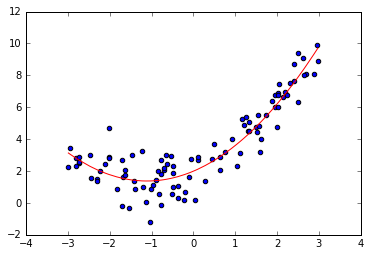

In [29]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='r')

In [30]:
lin_reg3.coef_, lin_reg3.intercept_

(array([0.        , 1.10886965, 0.4992392 ]), 1.990334088053185)

### 关于PolynomialFeatures

In [31]:
X = np.arange(1, 11).reshape(-1, 2)

In [32]:
X.shape

(5, 2)

In [33]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [34]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [35]:
X2.shape

(5, 6)

In [36]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

** 对于有两个特征的数组，会多出一列，由原始两列对应相乘**

### pipeline

In [37]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0, 1, 100)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [40]:
poly_reg.fit(X, y)

y_predict = poly_reg.predict(X)

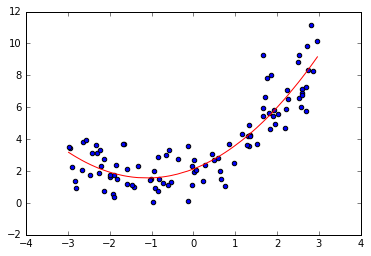

In [41]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

## 8-3 过拟合与欠拟合

In [42]:
#使用线性回归预测
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.566774525983675

In [43]:
#使用均方误差衡量性能
y_predict = lin_reg.predict(X)

from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

2.8094016449482746

In [46]:
#使用多项式回归预测

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])

In [47]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [48]:
y2_pred = poly2_reg.predict(X)
mean_squared_error(y, y2_pred)

1.3026526377076828

In [49]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_pred = poly10_reg.predict(X)
mean_squared_error(y, y10_pred)

1.1409897568452416

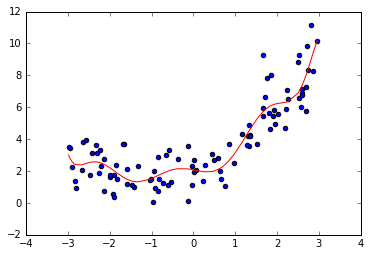

In [50]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_pred[np.argsort(x)], color='r')

## 8-4 泛化能力 为什么要划分测试数据集

## 8-5 学习曲线

随着训练样本的逐渐增多，算法训练出的模型的性能。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100)

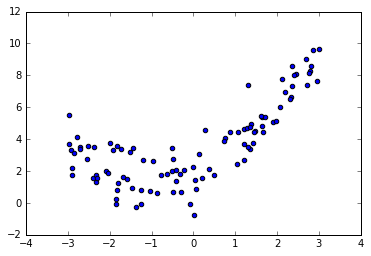

In [3]:
plt.scatter(x, y)

**学习曲线**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [6]:
X_train.shape

(75, 1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

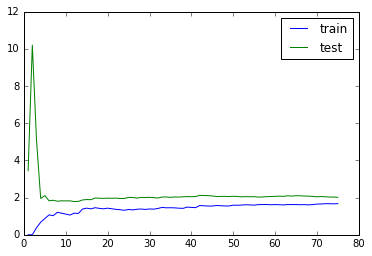

In [8]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test')
plt.legend()

In [9]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    
    train_score = []
    test_score = []
    for i in range(1, len(X_train)):
        
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train))], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train))], np.sqrt(test_score), label='train')
    plt.legend()#图例
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

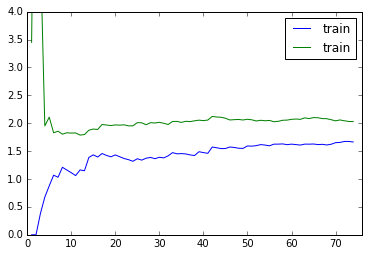

In [10]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
            ('ploy', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])

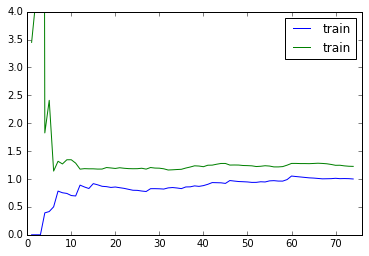

In [12]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

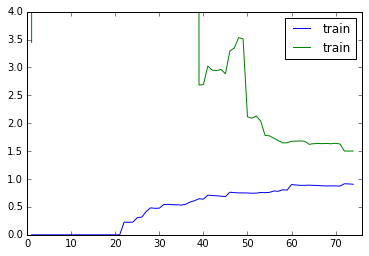

In [13]:
poly2_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

## 8-6 验证数据集与交叉验证

**问题：针对测试数据集过拟合**
- 训练数据
- 验证数据，调整超参数使用
- 测试数据，作为衡量最终模型性能的数据集

### 交叉验证

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

best_score,best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print('best K = ', best_k)
print('best P = ', best_p)
print('best score = ', best_score)

best K =  2
best P =  3
best score =  0.9958275382475661


** 使用交叉验证寻找最好超参数**

In [6]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)#输出表示把X_train分为了三份，每份的得分

array([0.97252747, 0.98324022, 0.98314607])

In [8]:
best_score,best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print('best K = ', best_k)
print('best P = ', best_p)
print('best score = ', best_score)

best K =  7
best P =  2
best score =  0.9815053494201068


In [9]:
#拿到了最好的超参数，用这个超参数在测试集上观察性能

best_knn_clf = KNeighborsClassifier(weights='distance',n_neighbors=7, p=2)

best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.9847009735744089

### 回顾网格搜索

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i in range(1,6)]
    }
]

#参数：分类器、参数网格、训练日志冗余（ 0：不输出，1：偶尔输出，>1：每次输出）
grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'p': [1, 2, 3, 4, 5], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
grid_search.best_score_

0.9814471243042672

In [12]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 3, 'weights': 'distance'}

In [13]:
best_knn_clf2 = grid_search.best_estimator_
best_knn_clf2.score(X_test, y_test)

0.9958275382475661

**cross validation 自定义份数**

In [14]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.98173516, 0.97706422, 0.96296296, 0.98598131, 0.96208531])

**GridSearchCV 自定义份数**

In [15]:
GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'p': [1, 2, 3, 4, 5], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## 偏差方差权衡

**模型误差=方差+偏差+不可避免的误差**
- 偏差原因：对问题本身的假设不准确，如非线性问题使用线性模型
- 方差原因：数据的一点扰动都会较大地影响模型结果，通常原因模型太复杂，如高阶多项式

>有一些算法天生是高方差的算法，如kNN。非参数学习通常都是高方差算法，因为不对数据进行假设。
有一些算法天生是高偏差算法，如线性回归。参数学习通常都是高偏差算法，因为对数据有极强的假设。

>大多数算法具有相应的参数，可以调节偏差和方差。
偏差和方差通常是矛盾的，降低偏差会提高方差，降低方差会提高偏差。



>**机器学习的主要挑战，来自于方差**，在算法上，而不是在问题上。  
解决高方差的通常手段：
1. 降低模型复杂度
2. 减少数据维度；降噪
3. 增加样本数
4. 使用验证集

## 8-8 模型泛化与岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义多项式回归

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
            ('poly',PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])

In [3]:
from sklearn.metrics import mean_squared_error



**模型正则化，损失函数中加入系数惩罚项1/2 *α∑θ^2(求和不加 θ0)**  
α是一个新的超参数，

In [4]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

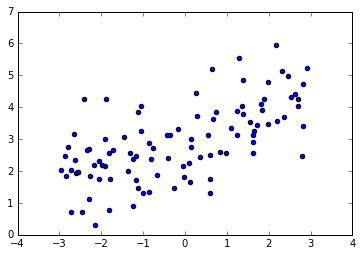

In [5]:
plt.scatter(x, y)

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_pred = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_pred)

167.94010860139662

[-3, 3, 0, 6]

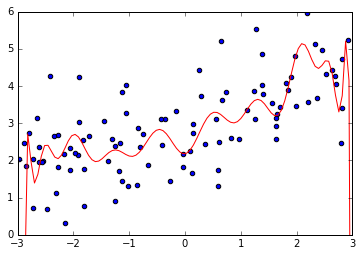

In [10]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])

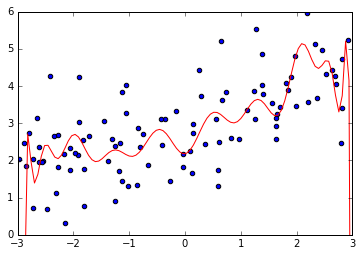

In [12]:
#封装画图代码

def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0 ,6])
    plt.show()
    
plot_model(poly_reg)

### 使用岭回归

In [16]:
from sklearn.linear_model import Ridge
#ridge = Ridge(alpha=1)

def RidgeRegression(degree, alpha):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std', StandardScaler()),
            ('ridge_reg', Ridge(alpha=alpha))
        ])

In [17]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_pred = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_pred)

1.3233492754168574

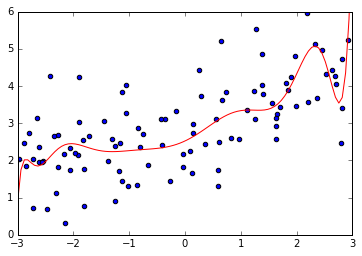

In [18]:
plot_model(ridge1_reg)

In [19]:
ridge1_reg = RidgeRegression(20, 1)
ridge1_reg.fit(X_train, y_train)

y1_pred = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_pred)

1.1888759304218441

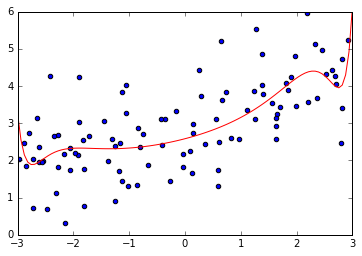

In [20]:
plot_model(ridge1_reg)

## 8-9 LASSO回归

原理与岭回归相同，在衡量θ上采用绝对值  
J(θ) = MSE(y,y_pred) + 1/2 *α∑θ^2(求和不加 θ0)

In [21]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lasso_reg', Lasso(alpha=alpha))
        ])

In [22]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_pred = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_pred)

1.1496080843259961

In [23]:
lasso1_reg = LassoRegression(20, 0.1)
lasso1_reg.fit(X_train, y_train)
y1_pred = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_pred)

1.1213911351818648

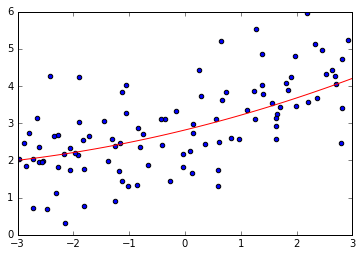

In [24]:
plot_model(lasso1_reg)

**比较Ridge和LASSO**
- LASSO得到的结果更接近直线，更倾向于某些参数为0，可以来选择特征，但可能丢失信息

## 8-10 L1,L2和弹性网络